In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.1 Problem-1 Getting started with Data Exploration

Data Exploration and Understanding:

• Dataset Overview:

a. Load the dataset and display the first 10 rows.

b. Identify the number of rows and columns in the dataset.

c. List all the columns and their data types

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#a
import pandas as pd
whr = pd.read_csv('/content/drive/MyDrive/DAV_SarahMaharjan/WHR-2024-5CS037.csv')
whr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
#b
rows, columns = whr.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9


In [ ]:
#c
whr.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:

a. Calculate the mean, median, and standard deviation for the Score column.

b. Identify the country with the highest and lowest happiness scores.

In [ ]:
#a
mean_score = whr['score'].mean()
median_score = whr['score'].median()
std_score = whr['score'].std()
print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_score}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
#b
high_score=whr.loc[whr["score"].idxmax(),"Country name"]
low_score=whr.loc[whr["score"].idxmin(),"Country name"]
print(f"Country with highest score: {high_score}")
print(f"Country with lowest score: {low_score}")

Country with highest score: Finland
Country with lowest score: Afghanistan


Missing Values:

a. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
#a.
missing_values = whr.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

a. Filter the dataset to show only the countries with a Score greater than 7.5.

b. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [ ]:
# a.
filtered_data = whr[whr['score'] > 7.5]
print("Filtered Dataset:")
print(filtered_data)

Filtered Dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# b.
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
top_10_rows = sorted_data.head(10)
print("Top 10 Rows:")
print(top_10_rows)

Top 10 Rows:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:

Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
whr['Happiness Category'] = whr['score'].apply(categorize_happiness)
whr.head()
print(whr)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

2. Data Visualizations:

a. Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

b. Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

c. Plot a histogram for the Score column to show its distribution and also interpret.

d. Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

<ipython-input-17-277b10d22810>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=categorize_happiness, palette = 'viridis')


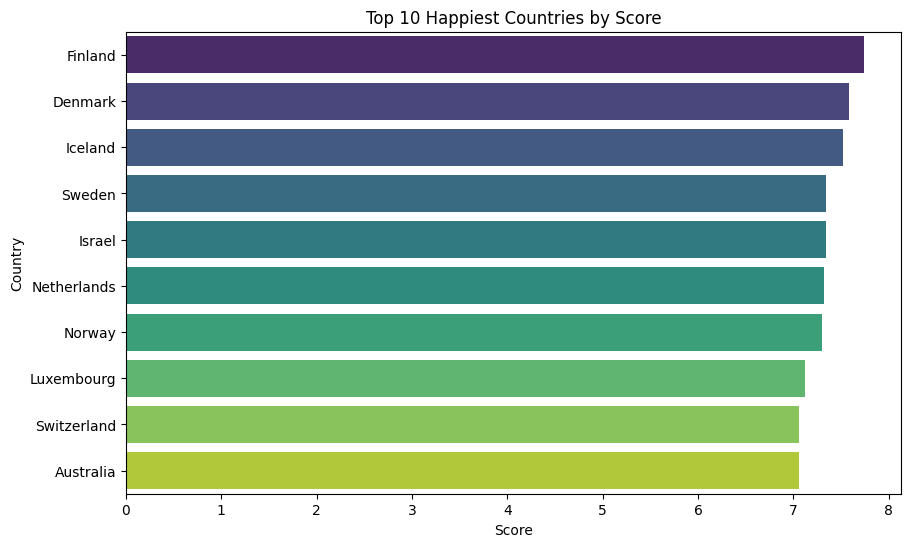

In [ ]:
# a.
categorize_happiness = whr.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=categorize_happiness, palette = 'viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()


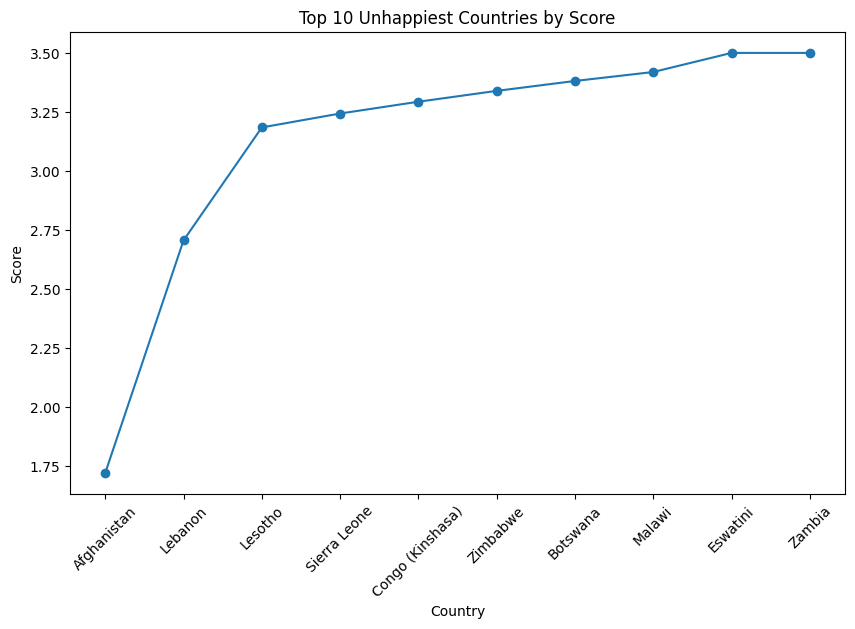

In [ ]:
#b
Unhappiest = whr.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(Unhappiest["Country name"], Unhappiest["score"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()

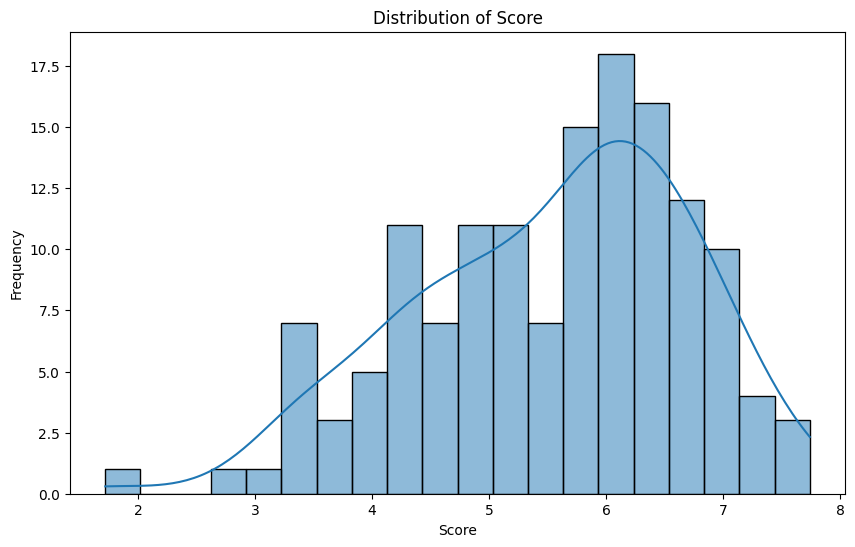

In [ ]:
# c
plt.figure(figsize=(10, 6))
sns.histplot(whr['score'], bins = 20, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

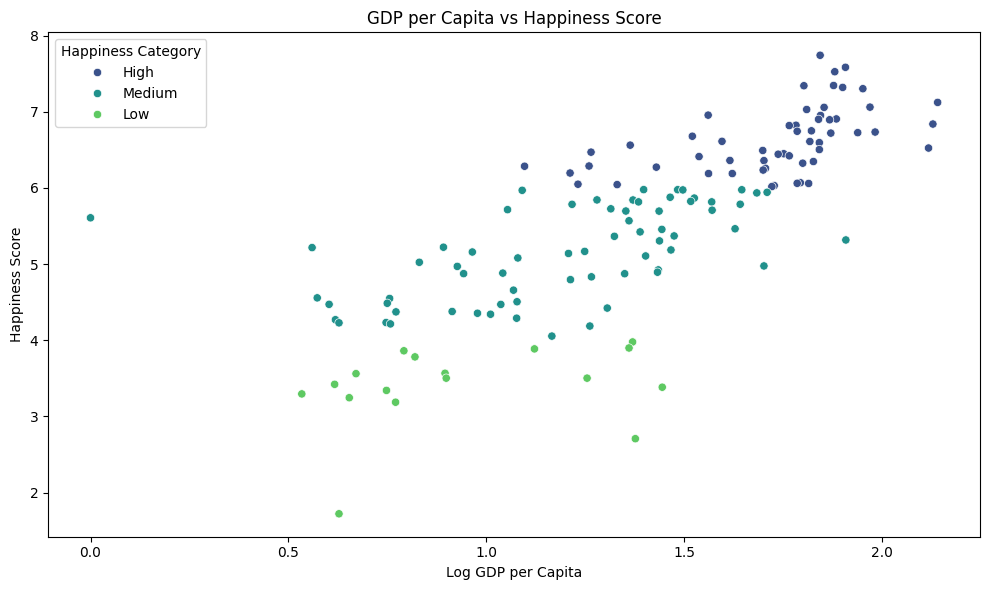

In [ ]:
# d.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=whr, hue='Happiness Category', palette='viridis')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category', loc='upper left')
plt.tight_layout()
plt.show()


3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
# 1.
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2.
south_asian_countries_data = whr[whr['Country name'].isin(south_asian_countries)]
print(south_asian_countries_data)

# 3.
south_asian_countries_data.to_csv('south_asian_countries_data.csv', index=False)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-48-f6bfc033a909>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_data['Composite Score'] = (
<ipython-input-48-f6bfc033a909>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top, palette='viridis')


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

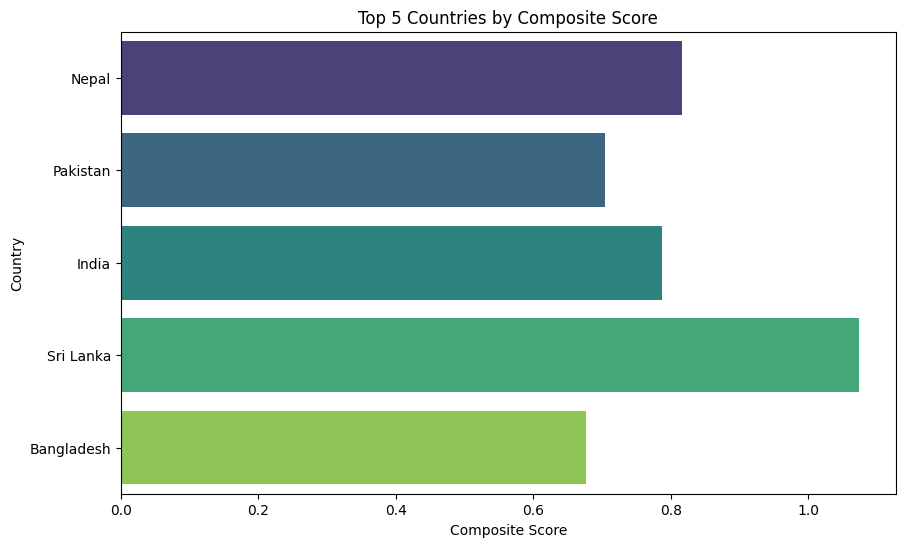

In [ ]:
# 1.
south_asian_countries_data['Composite Score'] = (
    0.40 * south_asian_countries_data['Log GDP per capita'] +
    0.30* south_asian_countries_data['Social support'] +
    0.30*south_asian_countries_data['Healthy life expectancy']
)
# 2.
south_asian_countries= south_asian_countries_data.sort_values(by='Composite Score', ascending=False)
print(south_asian_countries_data)
# 3.
top = south_asian_countries_data.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top, palette='viridis')
plt.title('Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


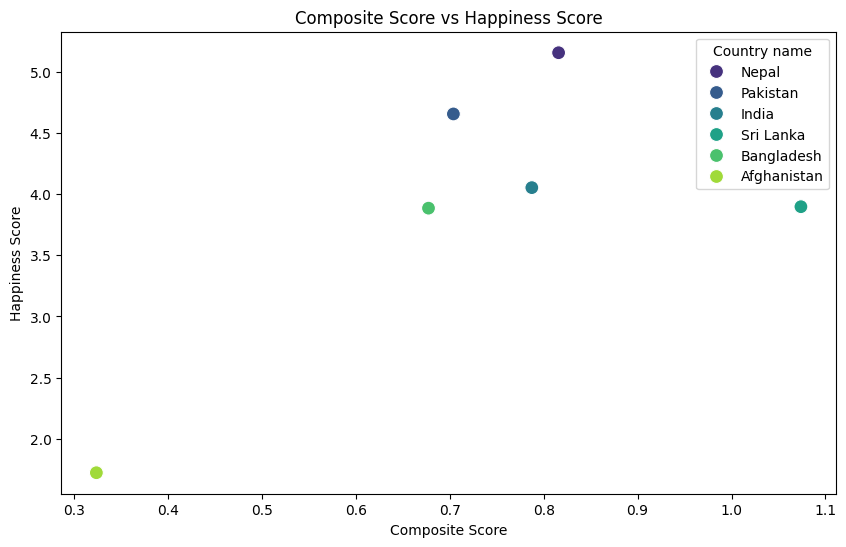

In [ ]:

# 4.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asian_countries_data, hue='Country name', palette='viridis', s=100)
plt.title('Composite Score vs Happiness Score')
plt.xlabel('Composite Score')
plt.ylabel('Happiness Score')
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [ ]:
# 1.
q1_gdp = south_asian_countries_data['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asian_countries_data['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

q1_score = south_asian_countries_data['score'].quantile(0.25)
q3_score = south_asian_countries_data['score'].quantile(0.75)
iqr_score = q3_score - q1_score

# 2
lower_gdp = q1_gdp - 1.5 * iqr_gdp
upper_gdp = q3_gdp + 1.5 * iqr_gdp
lpwer_score = q1_score - 1.5 * iqr_score
upper_score = q3_score + 1.5 * iqr_score

outliers = south_asian_countries_data[
    (south_asian_countries_data['Log GDP per capita'] < lower_gdp) |
    (south_asian_countries_data['Log GDP per capita'] > upper_gdp) |
    (south_asian_countries_data['score'] < lpwer_score) |
    (south_asian_countries_data['score'] > upper_score)
]
outliers


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low


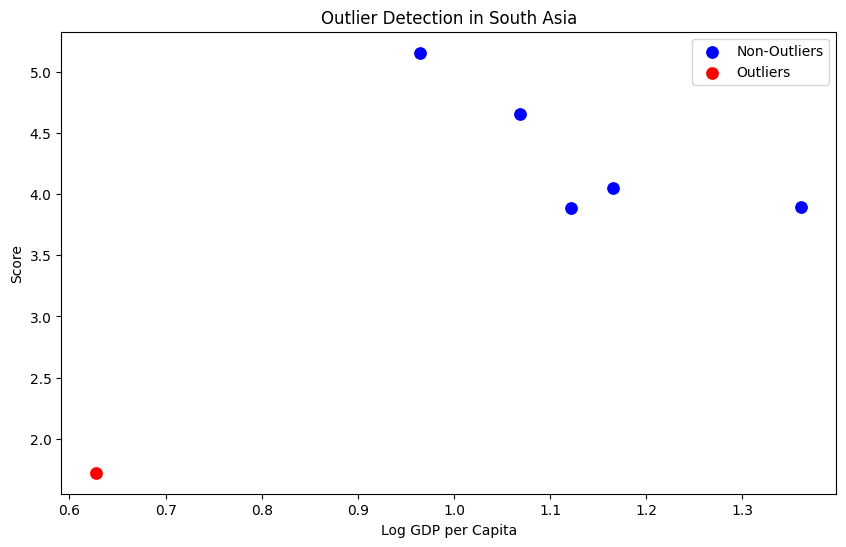

In [ ]:
# 3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_countries_data, label='Non-Outliers',color = 'blue', s=100)
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, label='Outliers', color='red', s=100)
plt.title('Outlier Detection in South Asia')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.show()

Task - 4 - Exploring Trends Across Metrics: Tasks:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

2. Create scatter plots with trendlines for these metrics against the Score.

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

In [ ]:
# 1.
correlation = south_asian_countries_data['Freedom to make life choices'].corr(south_asian_countries_data['score'])
generosity = south_asian_countries_data['Generosity'].corr(south_asian_countries_data['score'])

print(f"Freedom Correlation: {correlation}")
print(f"Generosity Correlation: {generosity}")


Freedom Correlation: 0.8005185224163315
Generosity Correlation: 0.874512371253192


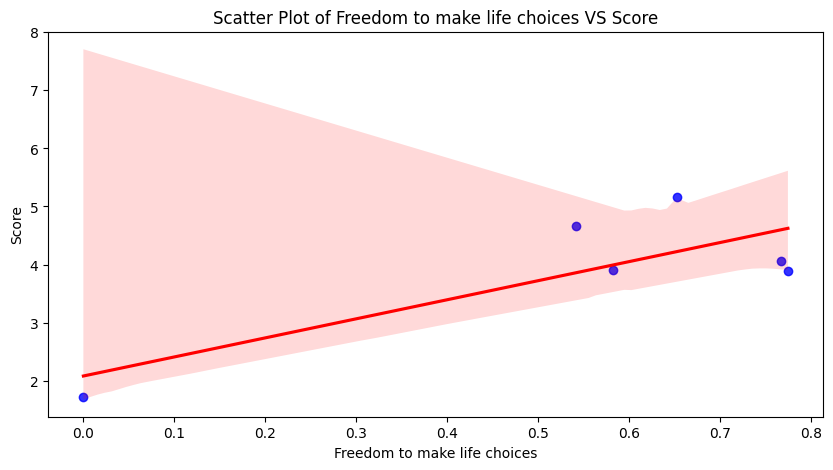

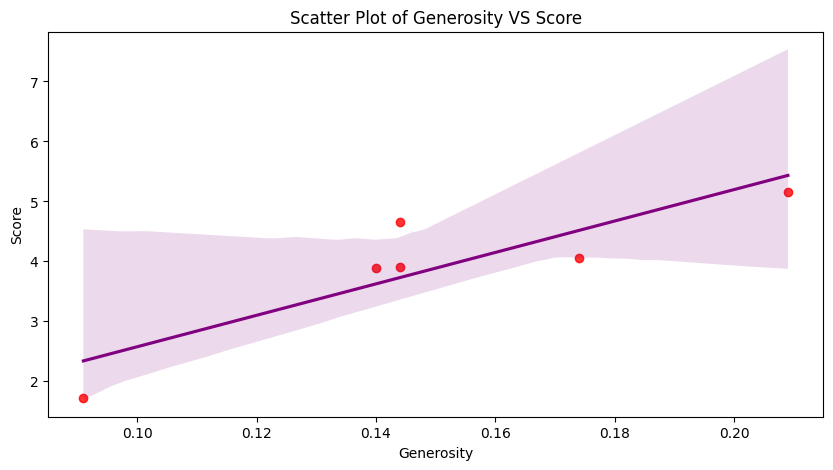

In [ ]:
# 2.
plt.figure(figsize = (10, 5))
sns.regplot(x ='Freedom to make life choices', y = 'score', data = south_asian_countries_data, color ='blue',line_kws={'color': 'red'})
plt.title('Scatter Plot of Freedom to make life choices VS Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize = (10,5))
sns.regplot(x ='Generosity', y = 'score', data= south_asian_countries_data, color = 'red', line_kws = {'color':'purple'})
plt.title('Scatter Plot of Generosity VS Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [ ]:
# 1
south_asian_countries_data['GDP-Score Gap'] = south_asian_countries_data['Log GDP per capita'] - south_asian_countries_data['score']

# 2
scoreGap_asc=south_asian_countries_data.sort_values(by="GDP-Score Gap",ascending=True)
scoreGap_desc=south_asian_countries_data.sort_values(by="GDP-Score Gap",ascending=False)

asc=scoreGap_asc[["Country name","GDP-Score Gap"]].head(3)
print(asc)
desc=scoreGap_desc[["Country name","GDP-Score Gap"]].head(3)
print(desc)

    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764


<ipython-input-74-4da2748e49f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_data['GDP-Score Gap'] = south_asian_countries_data['Log GDP per capita'] - south_asian_countries_data['score']


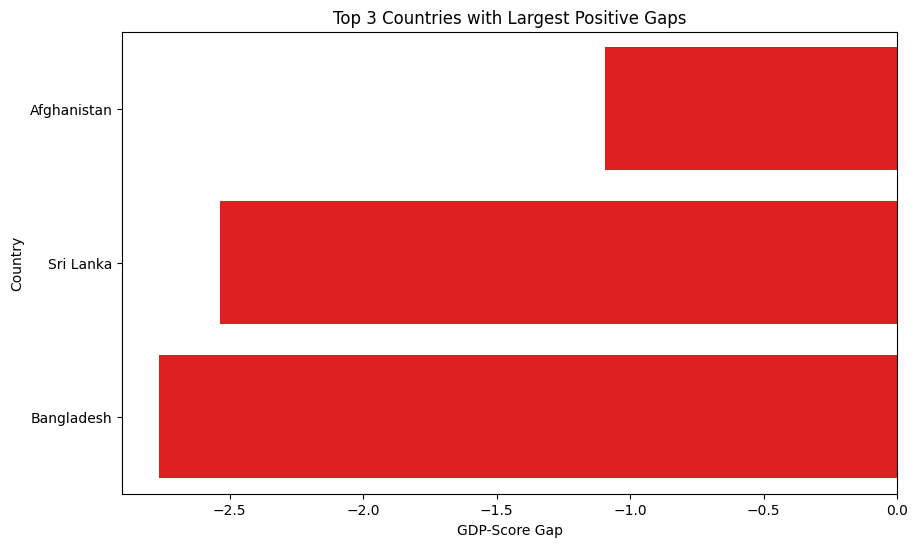

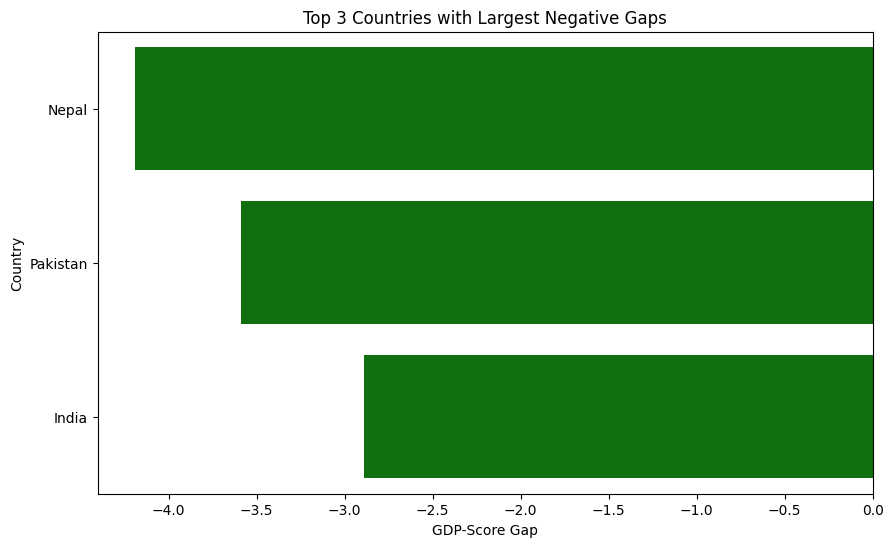

In [ ]:
# 3.
highgap = scoreGap_desc.head(3)
lowgap = scoreGap_asc.head(3)


plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=highgap, color='red')
plt.title('Top 3 Countries with Largest Positive Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=lowgap, color='green')
plt.title('Top 3 Countries with Largest Negative Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()


3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
middle_eastern_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_eastern_countries_data = whr[whr['Country name'].isin(middle_eastern_countries)]
middle_eastern_countries_data.to_csv('middle_eastern_countries_data.csv', index=False)

1. Descriptive Statistics:

a.Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

b. Which region has higher happiness Scores on average?

In [ ]:
# a.
sAsia_mean=south_asian_countries_data["score"].mean()
midEast_mean=middle_eastern_countries_data["score"].mean()

sAsia_std=south_asian_countries_data["score"].std()
midEast_std=middle_eastern_countries_data["score"].std()

print(f"\nSouth Asia \n Mean: {sAsia_mean} \n Standard Deviation: {sAsia_std}")
print(f"\nMiddle East \n Mean: {midEast_mean} \n Standard Deviation: {midEast_std}")


South Asia 
 Mean: 3.895666666666667 
 Standard Deviation: 1.1770690152521504

Middle East 
 Mean: 5.412100000000001 
 Standard Deviation: 1.5662011684327144


In [ ]:
# b.
higher_score = "South Asia" if sAsia_mean > midEast_mean else "Middle East"
print(f"The region with higher happiness scores on average is {higher_score}.")

The region with higher happiness scores on average is Middle East.


2. Top and Bottom Performers:

a. Identify the top 3 and bottom 3 countries in each region based on the score.

b.Plot bar charts comparing these charts.

In [ ]:
# a.
top_sa = south_asian_countries_data.nlargest(3, 'score')
bottom_sa = south_asian_countries_data.nsmallest(3, 'score')
top_me = middle_eastern_countries_data.nlargest(3, 'score')
bottom_me = middle_eastern_countries_data.nsmallest(3, 'score')
print(f"Top 3 countries of South Asia: \n {top_sa}, Bottom 3 countries of South Asia: \n {bottom_sa}")
print(f"Top 3 countries of Middle East: \n {top_me}, Bottom 3 countries of Middle East: \n {bottom_me}")

Top 3 countries of South Asia: 
     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783             Medium   
107                      0.074                1.907             Medium   
125                      0.122                0.756             Medium   

     Composite Score  GDP-Score Gap  
92            0.8159         -4.193  
107           0.7039         -3.588  
125   

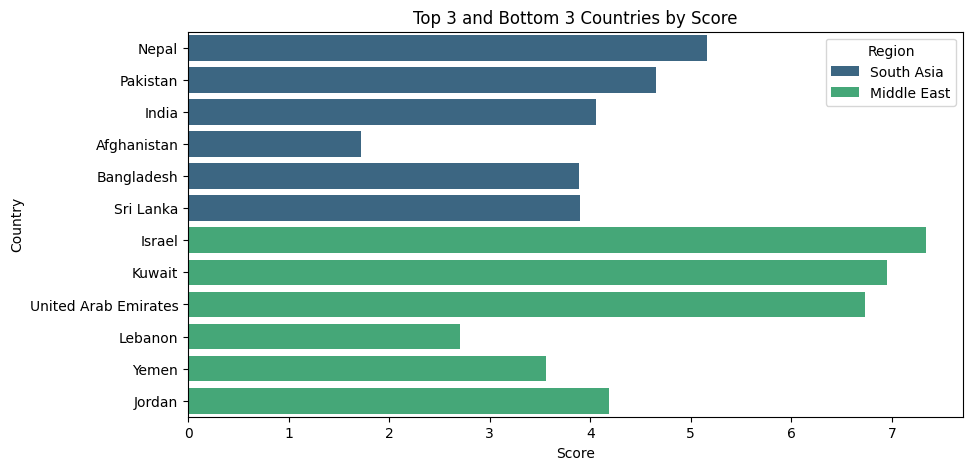

In [ ]:
# b.
top_bottom_data = pd.concat([top_sa.assign(Region = 'South Asia'), bottom_sa.assign(Region = 'South Asia'), top_me.assign(Region = 'Middle East'), bottom_me.assign(Region = 'Middle East')])
plt.figure(figsize = (10, 5))
sns.barplot(x = 'score', y ='Country name', data = top_bottom_data, hue = 'Region', palette = 'viridis')
plt.title('Top 3 and Bottom 3 Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

3. Metric Comparisons:

a. Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

b.Which metrics show the largest disparity between the two regions?

<Figure size 800x800 with 0 Axes>

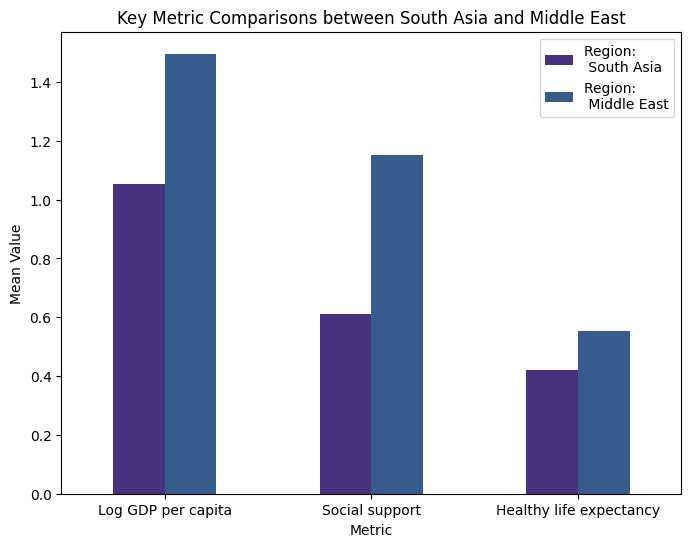

In [ ]:
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_sa = south_asian_countries_data[key_metrics].mean()
mean_me = middle_eastern_countries_data[key_metrics].mean()
comparison_df = pd.DataFrame({'Region: \n South Asia': mean_sa, 'Region: \n Middle East': mean_me}).reset_index().rename(columns ={'index': 'Metric'})
plt.figure(figsize=(8, 8))
sns.set_palette('viridis')
comparison_df.plot(kind='bar', x='Metric', figsize=(8, 6))
plt.title('Key Metric Comparisons between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

In [ ]:

disparities = abs(mean_sa - mean_me)
largest_disparity = disparities.idxmax()
print(f"The largest disparity is in: {largest_disparity}")

The largest disparity is in: Social support


In [ ]:
range_sa = south_asian_countries_data['score'].max()-south_asian_countries_data['score'].min()
range_me = middle_eastern_countries_data['score'].max() - middle_eastern_countries_data['score'].min()
cv_sa = south_asian_countries_data['score'].std() / south_asian_countries_data['score'].mean()
cv_me = middle_eastern_countries_data['score'].std() / middle_eastern_countries_data['score'].mean()
print(f"South Asia:\n Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East:\n Range: {range_me:.2f}, CV: {cv_me:.2f}")

South Asia:
 Range: 3.44, CV: 0.30
Middle East:
 Range: 4.63, CV: 0.29


5. Correlation Analysis:

a. Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

b. Create scatter plots to visualize and interpret the relationships.

In [ ]:
# a.
corr_freedom_sa = south_asian_countries_data['Freedom to make life choices'].corr(south_asian_countries_data['score'])
corr_freedom_me = middle_eastern_countries_data['Freedom to make life choices'].corr(middle_eastern_countries_data['score'])
corr_generosity_sa = south_asian_countries_data['Generosity'].corr(south_asian_countries_data['score'])
corr_generosity_me = middle_eastern_countries_data['Generosity'].corr(middle_eastern_countries_data['score'])
print(f"South Asia:\n Freedom Correlation: {corr_freedom_sa:.2f}, Geneoristy Correlation: {corr_generosity_me:.2f}")
print(f"Middle East:\n Freedom Correlation: {corr_freedom_me:.2f}, Geneoristy Correlation: {corr_generosity_me:.2f}")

South Asia:
 Freedom Correlation: 0.80, Geneoristy Correlation: 0.63
Middle East:
 Freedom Correlation: 0.86, Geneoristy Correlation: 0.63


Correlation of Score with Freedom to make life choices
South Asia: 0.8005185224163315
Middle East: 0.8632202433827544
Correlation of Score with Generosity
South Asia: 0.874512371253192
Middle East: 0.6275236536964182


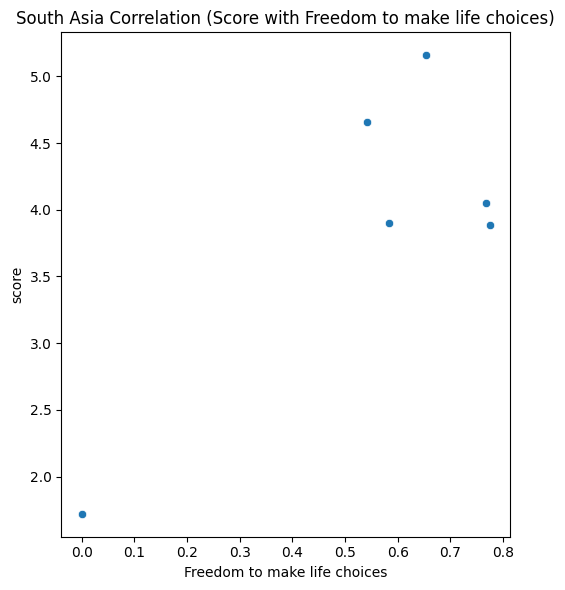

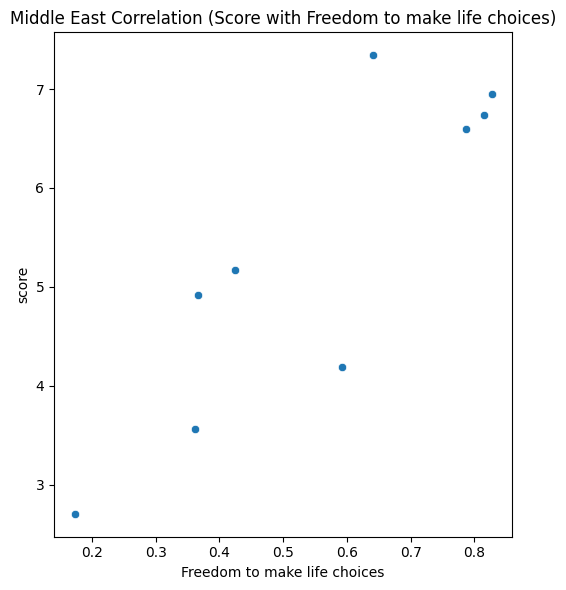

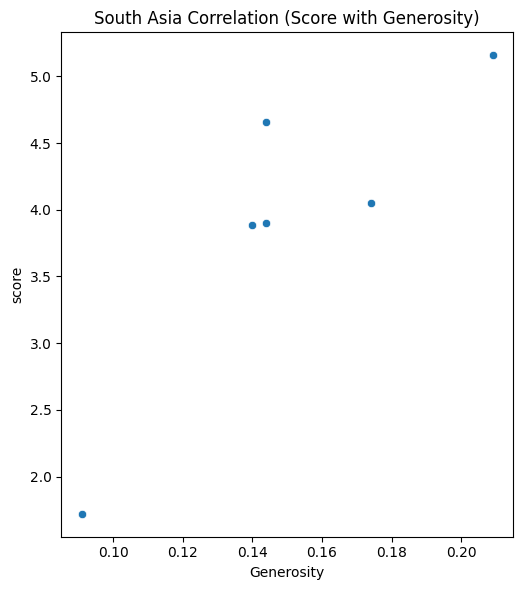

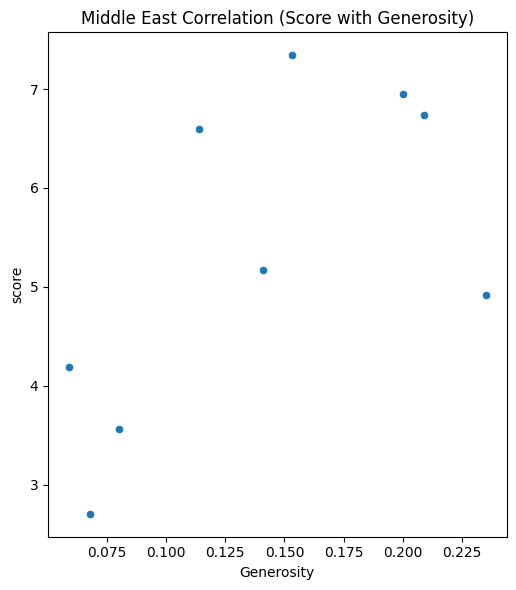

In [ ]:
metrics=["Freedom to make life choices","Generosity"]

for m in metrics:
  print(f"Correlation of Score with {m}")
  print("South Asia:", south_asian_countries_data['score'].corr(south_asian_countries_data[m]))
  print("Middle East:", middle_eastern_countries_data['score'].corr(middle_eastern_countries_data[m]))

for m in metrics:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.scatterplot(x=m, y="score",data=south_asian_countries_data)
    plt.title(f"South Asia Correlation (Score with {m})")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.scatterplot(x=m, y="score",data=middle_eastern_countries_data)
    plt.title(f"Middle East Correlation (Score with {m})")
    plt.tight_layout()
    plt.show()


Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [ ]:
def detect_outliers(df, column):
  q1, q3 = df[column].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return df[(df[column] < lower_bound) | (df[column]> upper_bound)]

outliers_sa = detect_outliers(south_asian_countries_data, 'score')
outliers_me = detect_outliers(middle_eastern_countries_data, 'score')

print("South Asia Outliers:", outliers_sa)
print("Middle East Outliers:", outliers_me)

South Asia Outliers:     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
142                      0.088                0.672                Low  
Middle East Outliers: Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []


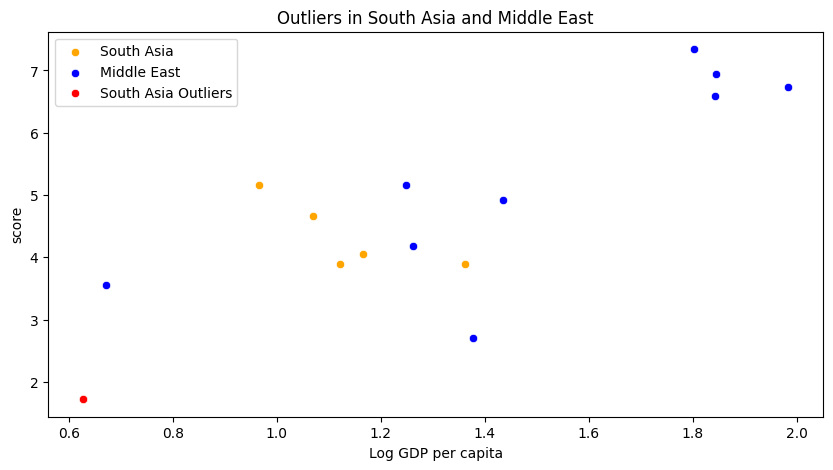

In [ ]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Log GDP per capita', y = 'score', data = south_asian_countries_data, label ='South Asia', color= 'orange')
sns.scatterplot(x = 'Log GDP per capita', y = 'score', data = middle_eastern_countries_data, label = 'Middle East', color = 'blue')
sns.scatterplot(x = 'Log GDP per capita', y = 'score', data = outliers_sa, color = 'red', label = 'South Asia Outliers')
sns.scatterplot(x = 'Log GDP per capita', y = 'score', data = outliers_me, color = 'red', label = 'Middle East Outliers')
plt.title('Outliers in South Asia and Middle East')
plt.legend()
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

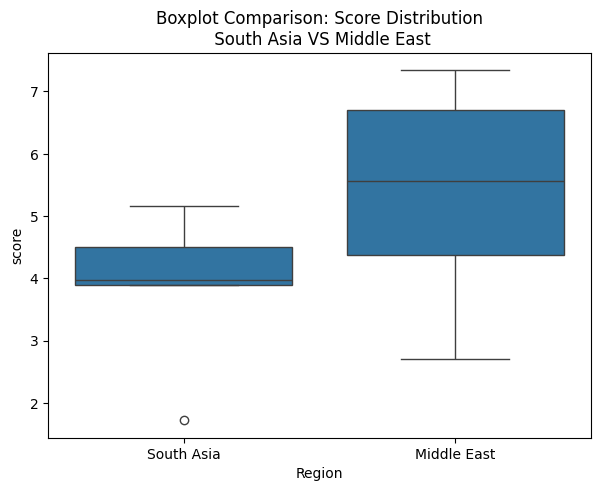

In [ ]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'Region', y='score', data = pd.concat([south_asian_countries_data.assign(Region = 'South Asia'), middle_eastern_countries_data.assign(Region = 'Middle East')]))
plt.title('Boxplot Comparison: Score Distribution\n South Asia VS Middle East')
plt.show()